# Introduction to the xgbsurv package - AH

This notebook introduces `xgbsurv` using a specific dataset. It structured by the following steps:

- Load data
- Load model
- Fit model
- Predict and evaluate model

The syntax conveniently follows that of sklearn.

In [1]:
from xgbsurv.datasets import load_metabric
from xgbsurv import XGBSurv
from xgbsurv.models.utils import sort_X_y, transform_back
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
current_path = os.getcwd() 
one_level_up = os.path.abspath(os.path.join(current_path,  ".."))

## Load Data

In [2]:
data = load_metabric(path=one_level_up+"/xgbsurv/datasets/data/", as_frame=False)
# stratify by event indicated by sign
target_sign = np.sign(data.target)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=target_sign)
# sort data
X_train, y_train = sort_X_y(X_train, y_train)
X_test, y_test = sort_X_y(X_test, y_test)

Values are being sorted!
Values are being sorted!


## Load Model

In [3]:
model = XGBSurv(n_estimators=100, objective="ah_objective",
                                             eval_metric="ah_loss",
                                             learning_rate=0.3,
                                             random_state=42, 
                                             disable_default_eval_metric=1,
                                             )
model

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function ah_likelihood at 0x2867fd300>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function ah_objective at 0x2867fd580>), ...)

The options of loss and objective functions can be obtained like below:

In [4]:
print(model.get_loss_functions().keys())
print(model.get_objective_functions().keys())

dict_keys(['breslow_loss', 'efron_loss', 'cind_loss', 'deephit_loss', 'aft_loss', 'ah_loss', 'eh_loss'])
dict_keys(['breslow_objective', 'efron_objective', 'cind_objective', 'deephit_objective', 'aft_objective', 'ah_objective', 'eh_objective'])


## Fit Model

In [5]:
eval_set = [(X_train, y_train)]

In [6]:
model.fit(X_train, y_train, eval_set=eval_set)

[0]	validation_0-ah_likelihood:2576.27859
[1]	validation_0-ah_likelihood:2572.94430
[2]	validation_0-ah_likelihood:2569.67756
[3]	validation_0-ah_likelihood:2564.80940
[4]	validation_0-ah_likelihood:2560.92606
[5]	validation_0-ah_likelihood:2554.65782
[6]	validation_0-ah_likelihood:2546.88504
[7]	validation_0-ah_likelihood:2538.57670
[8]	validation_0-ah_likelihood:2530.89423
[9]	validation_0-ah_likelihood:2518.08691
[10]	validation_0-ah_likelihood:2507.98872
[11]	validation_0-ah_likelihood:2487.72933
[12]	validation_0-ah_likelihood:2469.70056
[13]	validation_0-ah_likelihood:2454.53184
[14]	validation_0-ah_likelihood:2447.57431
[15]	validation_0-ah_likelihood:2435.62162
[16]	validation_0-ah_likelihood:2426.42029
[17]	validation_0-ah_likelihood:2416.61256
[18]	validation_0-ah_likelihood:2407.97100
[19]	validation_0-ah_likelihood:2389.68604
[20]	validation_0-ah_likelihood:2380.12693
[21]	validation_0-ah_likelihood:2375.55975
[22]	validation_0-ah_likelihood:2370.30232
[23]	validation_0-ah_

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function ah_likelihood at 0x2867fd300>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function ah_objective at 0x2867fd580>), ...)

The model can be saved like below. Note that objective and eval_metric are not saved.

In [7]:
#model.save_model("introduction_model_breslow.json")

## Predict

In [8]:
preds_train = model.predict(X_train, output_margin=True)
preds_test = model.predict(X_test, output_margin=True)

### Predict Cumulative Hazard

In [9]:
df_cum_hazards = model.predict_cumulative_hazard_function(X_train, X_test, y_train, y_test)
df_cum_hazards.tail(3)

integration values 54750


,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
300.700012,1.344522,1.610897,1.622838,1.187157,0.976591,1.569669,0.948065,0.787391,1.320135,1.595314,...,1.581538,1.378373,1.622184,1.528036,1.053178,1.583655,1.596113,1.610452,1.358050,0.875155
301.233337,1.345048,1.613126,1.625612,1.187348,0.976632,1.571335,0.948096,0.787397,1.320531,1.598923,...,1.585243,1.378957,1.625131,1.529264,1.053271,1.585502,1.598192,1.612744,1.358604,0.875170
322.833344,1.361669,1.697540,1.733607,1.193640,0.977868,1.631825,0.949032,0.787551,1.334971,1.736876,...,1.729375,1.399136,1.737027,1.575961,1.055622,1.652196,1.671532,1.696557,1.376554,0.875613


## Predict Survival Function

In [10]:
df_survival_function = model.predict_survival_function(X_train, X_test, y_train, y_test)
df_survival_function.tail(3)

integration values 54750


,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
300.700012,0.260664,0.199708,0.197338,0.305087,0.376593,0.208114,0.387490,0.455030,0.267099,0.202845,...,0.205659,0.251988,0.197467,0.216961,0.348827,0.205224,0.202683,0.199797,0.257162,0.416797
301.233337,0.260527,0.199264,0.196791,0.305029,0.376577,0.207768,0.387478,0.455028,0.266994,0.202114,...,0.204898,0.251841,0.196886,0.216695,0.348795,0.204845,0.202262,0.199340,0.257019,0.416791
322.833344,0.256233,0.183134,0.176646,0.303116,0.376112,0.195572,0.387115,0.454958,0.263166,0.176070,...,0.177395,0.246810,0.176043,0.206809,0.347976,0.191629,0.187959,0.183314,0.252447,0.416607


### Visualize Predictions

Text(0.5, 1.0, 'Cumulative Hazard Breslow')

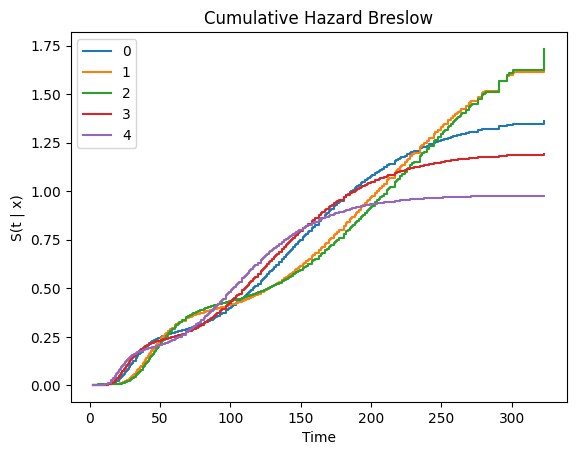

In [11]:
df_cum_hazards.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Cumulative Hazard Breslow")

Text(0.5, 1.0, 'Survival Curve Breslow')

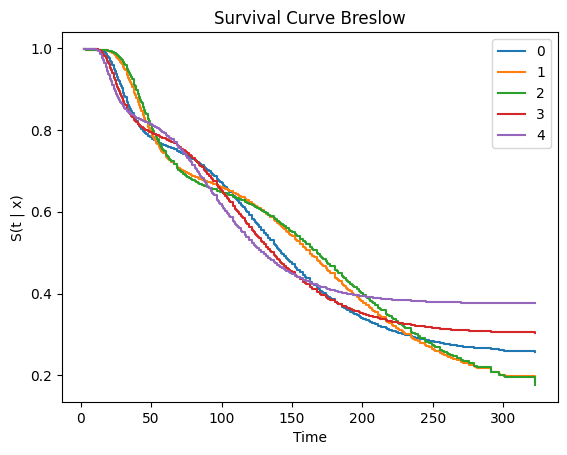

In [12]:
df_survival_function.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Survival Curve Breslow")

## Evaluate

### Test

In [13]:
durations_test, events_test = transform_back(y_test)
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
ev = EvalSurv(df_survival_function, durations_test, events_test, censor_surv='km')
print('Concordance Index',ev.concordance_td('antolini'))

Concordance Index 0.5238516694244558


In [14]:
print('Integrated Brier Score:',ev.integrated_brier_score(time_grid))

Integrated Brier Score: 0.19217443278128904
